![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## **$$\textbf{ Least square Regression Modeling Using Salary and Experience}$$**


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
##**Creating Pandas DataFrame with a .cvs file on google drive**

####**Step 1:** Define a variable with the URL

In [ ]:
sheet_URL = "https://docs.google.com/spreadsheets/d/1afr2WMa0mp5m-TycKlJ0dRKNnoGGUobSanhGF43hP9E/edit#gid=0"
# convert it to a csv file format, coma seperated values
url = sheet_URL.replace("edit#gid=", "export?format=csv&gid=")

#### **Step 2:** Create a dataframe in pandas

In [ ]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## **Least square Modeling in Python**

$$y = \beta X + \epsilon$$

####**Normal Equation for solving coefficients in LSM**

In [ ]:
import numpy as np

# number of data points

m = len(df["YearsExperience"])

# x is a vector of (m, 1)

X = np.array([df["YearsExperience"]]).T
print(f"design matrix\n{X}")

Y = df["Salary"]
print(f"observation vector : \n{Y}")

design matrix
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
observation vector : 
0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


####**1.** Solve for $\beta$ using normal equation and `numpy.linalg.solve(LH,RH)`

In [ ]:
beta = np.linalg.solve(X.T @ X, X.T @ Y)

print(f"fitted parameter beta = {beta}")

fitted parameter beta = [13254.93845442]


####**The Model**
Salary = $13,254.94/year(Years of Experience)

#### **2.** Predict values of salary

In [ ]:
YHat = X @ beta

# print(f"the predicted salary \n {YHat}")
df["Predicted"] = np.round(YHat, 2)
df.head()

,YearsExperience,Salary,Predicted
0,1.1,39343,14580.43
1,1.3,46205,17231.42
2,1.5,37731,19882.41
3,2.0,43525,26509.88
4,2.2,39891,29160.86


####**3.** Plot the data and model

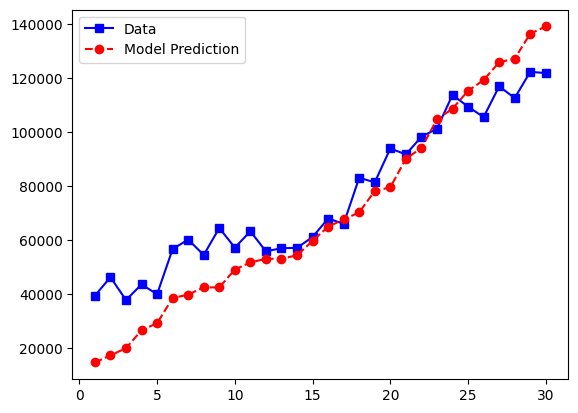

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, m + 1), # create positions on the x axis for each data point
         Y, # plot the data along each position of the x point above
         "bs-", # plot the data as points and connect them with a solid line
         label = "Data"
         )

plt.plot(np.arange(1, m + 1), # create positions on the x axis for each data point
         YHat, # plot the predicted values along each position of the x point above
         "ro--", # plot the data as points and connect them with a dash line
         label = "Model Prediction"
         )

plt.legend()
plt.show()

####**4.** Compute the R^2

In [ ]:
R_squared = 1 - sum((Y - YHat) ** 2) / sum((Y - np.mean(Y)) ** 2)

print(f"{R_squared : .2%} of the data variation an be explained by the model")

 75.90% of the data variation an be explained by the model


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
$$y = \beta_0 + \beta_1 X + \epsilon$$

####**1.** Perform the regression and predict the values of salary

In [ ]:
import numpy as np

m = len(df["YearsExperience"])
xb = np.ones((m, 1)) # constant

xbeta = np.array([df["YearsExperience"]]).T

# X = [xb, xbeta]
X = np.concatenate([xb, xbeta], axis = 1)
y = df["Salary"]

# fit
beta = np.linalg.solve(X.T @ X, X.T @ y)
print(f"Design matrix X \n{X}")

Design matrix X 
[[ 1.   1.1]
 [ 1.   1.3]
 [ 1.   1.5]
 [ 1.   2. ]
 [ 1.   2.2]
 [ 1.   2.9]
 [ 1.   3. ]
 [ 1.   3.2]
 [ 1.   3.2]
 [ 1.   3.7]
 [ 1.   3.9]
 [ 1.   4. ]
 [ 1.   4. ]
 [ 1.   4.1]
 [ 1.   4.5]
 [ 1.   4.9]
 [ 1.   5.1]
 [ 1.   5.3]
 [ 1.   5.9]
 [ 1.   6. ]
 [ 1.   6.8]
 [ 1.   7.1]
 [ 1.   7.9]
 [ 1.   8.2]
 [ 1.   8.7]
 [ 1.   9. ]
 [ 1.   9.5]
 [ 1.   9.6]
 [ 1.  10.3]
 [ 1.  10.5]]


####**2.** Plot

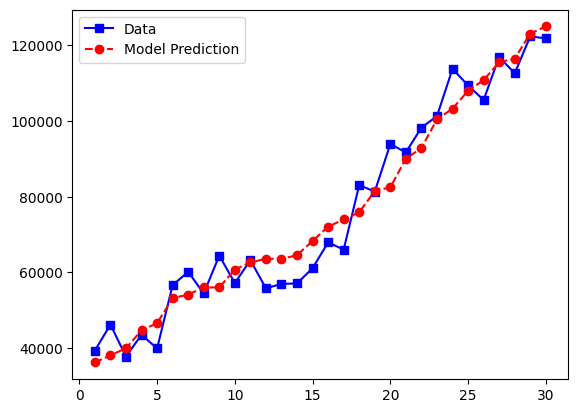

In [ ]:
import matplotlib.pyplot as plt

yHat = X @ beta

plt.plot(np.arange(1, m + 1), # create positions on the x axis for each data point
         y, # plot the data along each position of the x point above
         "bs-", # plot the data as points and connect them with a solid line
         label = "Data"
         )

plt.plot(np.arange(1, m + 1), # create positions on the x axis for each data point
         yHat, # plot the predicted values along each position of the x point above
         "ro--", # plot the data as points and connect them with a dash line
         label = "Model Prediction"
         )

plt.legend()
plt.show()

####**3.** Compute the R^2

In [ ]:
R_squared = 1 - sum((y - yHat) ** 2) / sum((y - np.mean(y)) ** 2)

print(f"{R_squared : .2%} of the data variation an be explained by the model")

 95.70% of the data variation an be explained by the model


In [ ]:
print(f"beta = {beta}")

beta = [25792.20019867  9449.96232146]


####**The Model**
Salary = \$25,792.20 + \$9,449.96/year(Years of Experience)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
$$y = \beta_0 + \beta_1 X^{2} + \epsilon$$

####**1.** Perform the regression and predict the values of salary

In [ ]:
import numpy as np

m = len(df["YearsExperience"])
xb = np.ones((m, 1)) # constant

xbeta = np.array([df["YearsExperience"] ** 2]).T

# X = [xb, xbeta]
X = np.concatenate([xb, xbeta], axis = 1)
y = df["Salary"]

# fit
beta = np.linalg.solve(X.T @ X, X.T @ y)
print(f"Design matrix X \n{X}")

Design matrix X 
[[  1.     1.21]
 [  1.     1.69]
 [  1.     2.25]
 [  1.     4.  ]
 [  1.     4.84]
 [  1.     8.41]
 [  1.     9.  ]
 [  1.    10.24]
 [  1.    10.24]
 [  1.    13.69]
 [  1.    15.21]
 [  1.    16.  ]
 [  1.    16.  ]
 [  1.    16.81]
 [  1.    20.25]
 [  1.    24.01]
 [  1.    26.01]
 [  1.    28.09]
 [  1.    34.81]
 [  1.    36.  ]
 [  1.    46.24]
 [  1.    50.41]
 [  1.    62.41]
 [  1.    67.24]
 [  1.    75.69]
 [  1.    81.  ]
 [  1.    90.25]
 [  1.    92.16]
 [  1.   106.09]
 [  1.   110.25]]


####**2.** Plot

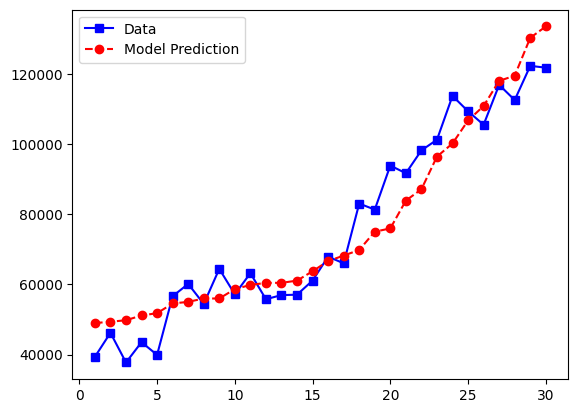

In [ ]:
import matplotlib.pyplot as plt

yHat = X @ beta

plt.plot(np.arange(1, m + 1), # create positions on the x axis for each data point
         y, # plot the data along each position of the x point above
         "bs-", # plot the data as points and connect them with a solid line
         label = "Data"
         )

plt.plot(np.arange(1, m + 1), # create positions on the x axis for each data point
         yHat, # plot the predicted values along each position of the x point above
         "ro--", # plot the data as points and connect them with a dash line
         label = "Model Prediction"
         )

plt.legend()
plt.show()

####**3.** Compute the R^2

In [ ]:
R_squared = 1 - sum((y - yHat) ** 2) / sum((y - np.mean(y)) ** 2)

print(f"{R_squared : .2%} of the data variation an be explained by the model")

 91.53% of the data variation an be explained by the model


In [ ]:
print(f"beta = {beta}")

beta = [48042.58551458   776.31877331]


####**The Model**
Salary = \$48042.59 + \$776.32/year(Years of Experience)$^{2}$